In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
# Load the dataset
creditrisk_dataset = pd.read_csv('creditrisk_dataset.csv')

In [3]:
# Print the number of missing values in each column
print("Missing values in each column:")
print(creditrisk_dataset.isnull().sum())

Missing values in each column:
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [4]:
# Remove the columns "person_emp_length" and "loan_int_rate"
creditrisk_dataset.drop(columns=["person_emp_length", "loan_int_rate"], inplace=True)

In [5]:
# Print the number of missing values in each column
print("Missing values in each column:")
print(creditrisk_dataset.isnull().sum())

Missing values in each column:
person_age                    0
person_income                 0
person_home_ownership         0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


In [6]:
# Remove outlier rows using Z-score method
z_threshold = 3
z_scores = zscore(creditrisk_dataset.select_dtypes(include='number'))
outliers_mask = (z_scores > z_threshold).any(axis=1)
creditrisk_dataset = creditrisk_dataset[~outliers_mask]

In [7]:
creditrisk_dataset.head()

,person_age,person_income,person_home_ownership,loan_intent,loan_grade,loan_amnt,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,EDUCATION,B,1000,0,0.10,N,2
5,21,9900,OWN,VENTURE,A,2500,1,0.25,N,2
9,21,10000,OWN,VENTURE,D,1600,1,0.16,N,3
11,21,10000,OWN,HOMEIMPROVEMENT,A,4500,1,0.45,N,2
19,24,10800,MORTGAGE,EDUCATION,B,1750,1,0.16,N,2


In [8]:
# Convert categorical variables into numerical representations using one-hot encoding
creditrisk_dataset = pd.get_dummies(creditrisk_dataset, columns=['person_home_ownership','loan_intent', 'loan_grade'])

In [9]:
# Map 'Y' and 'N' in 'cb_person_default_on_file' to 1 and 0, respectively
creditrisk_dataset['cb_person_default_on_file'] = creditrisk_dataset['cb_person_default_on_file'].map({'Y': 1, 'N': 0})

In [10]:
# Split the data into features (X) and target (y)
X = creditrisk_dataset.drop('loan_status', axis=1)
y = creditrisk_dataset['loan_status']

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Build the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [13]:
# Predict on the test set
y_pred = model.predict(X_test)

In [14]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [15]:
# Print evaluation metrics
print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)

Accuracy: 0.8084628946946626
ROC AUC: 0.5640205650604009


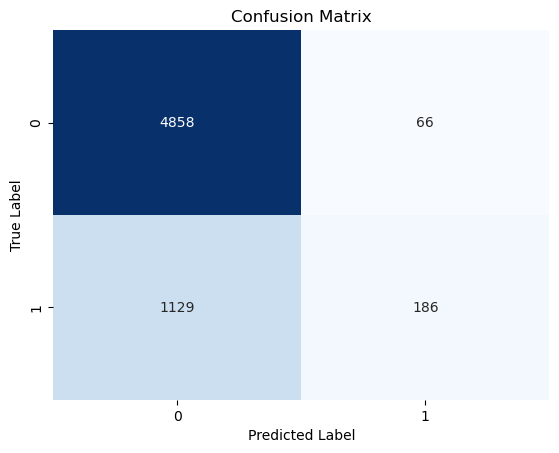

In [16]:
# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

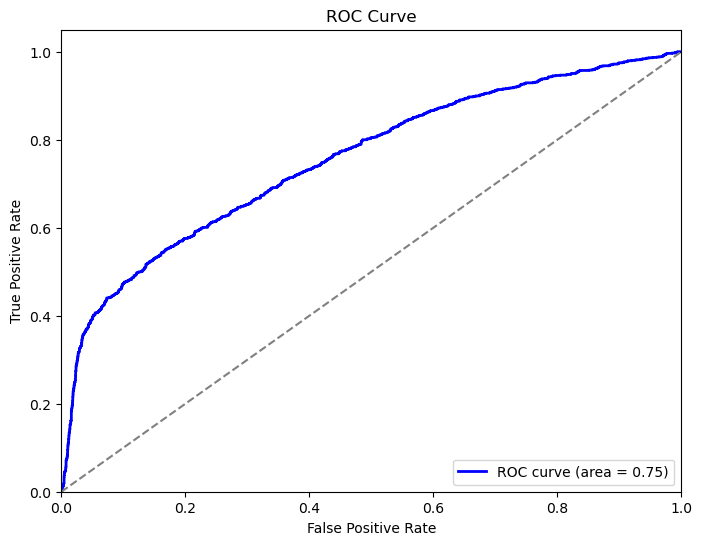

In [17]:
# Plot ROC Curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()